In [1]:
#Q1. What is the relationship between polynomial functions and kernel functions in machine learning
#algorithms?

Polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models in machine learning

It represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models

Polynomial kernel SVM is a powerful algorithm that can handle high-dimensional datasets and capture non-linear relationships between the input data. It has several advantages over other machine learning algorithms and can be used in a wide range of applications, such as image classification, text classification, and bioinformatics

In [ ]:
#Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. If we want to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn’s svm library. This class takes one parameter, which is the kernel type

In [2]:
#Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

The value of epsilon determines the width of the tube around the estimated function (hyperplane) in SVR. Points that fall inside this tube are considered as correct predictions and are not penalized by the algorithm

Increasing epsilon will increase the width of this tube, which means that more points will be considered as correct predictions and fewer support vectors will be needed to define the hyperplane

In [3]:
#Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
#affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
#and provide examples of when you might want to increase or decrease its value?

Support Vector Regression (SVR) is a type of regression analysis that uses Support Vector Machines (SVMs) to predict continuous variables

The choice of kernel function can affect the performance of SVR because different kernel functions have different properties and are suitable for different types of data

If C is too large, the model may overfit the training data. If C is too small, the model may underfit the training data

Epsilon parameter specifies how much error is allowed in the training data

Gamma, affects how tightly the decision boundary follows the training data,  If gamma is too large, the model may overfit the training data. If gamma is too small, the model may underfit the training data

In [10]:
#Q5. Assignment:
#L Import the n#ecessary libraries and load the dataset
#L Split the da#taset into training and testing setZ
#L Preprocess t#he data using any technique of your choice (e.g. scaling, normaliMationK
#L Create an in#stance of the SVC classifier and train it on the training datW
#L hse the trai#ned classifier to predict the labels of the testing datW
#L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
#precision, recall, F1-scoreK
#L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
#improve its performanc_
#L Train the tuned classifier on the entire dataseg
#L Save the trained classifier to a file for future use.

In [12]:
# Import the necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
from sklearn.metrics import RocCurveDisplay

filterwarnings('ignore')


df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#Split the da#taset into training and testing sets

X=df.drop('Outcome', axis=1)
y=df['Outcome']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)

In [14]:
#Preprocess the data using any technique of your choice (e.g. scaling, normalisation)

std_scalar=StandardScaler()

X_train=std_scalar.fit_transform(X_train)
X_test=std_scalar.transform(X_test)


Accuracy: 0.7835497835497836
[[141  16]
 [ 34  40]]


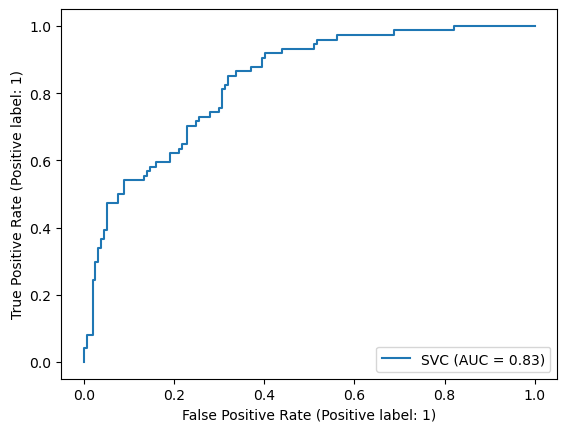

In [15]:
#Create an instance of the SVC classifier and train it on the training datW
# Use the trained classifier to predict the labels of the testing datW
# Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score

svc_classifier= SVC(kernel='linear', random_state=40)

svc_classifier.fit(X_train,y_train)

y_pred=svc_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(svc_classifier, X_test, y_test)



Accuracy is good and but we can try improve it further

In [16]:
#Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
#improve its performance

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1,5, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# Fit the grid search object to the training data and obtain the best hyperparameters

grid_search = GridSearchCV(svc_classifier, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.7615610938040844


In [19]:
#Train the tuned classifier on the entire dataset
tuned_classifier = grid_search.best_estimator_
tuned_classifier.fit(X_train, y_train)
y_pred = tuned_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7835497835497836


[[141  16]
 [ 34  40]]


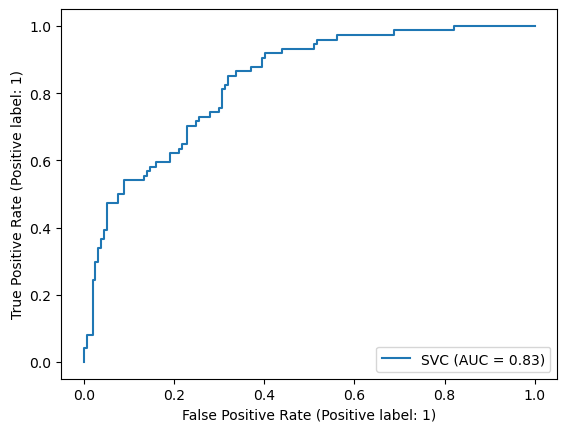

In [20]:
from sklearn.metrics import RocCurveDisplay

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(tuned_classifier, X_test, y_test)


In [21]:
#Save the trained classifier to a file for future use.

import joblib

# Save the model as a pickle file
filename = 'finalized_model.sav'
joblib.dump(tuned_classifier, filename)

['finalized_model.sav']